#**PRÉ-PROCESSAMENTO**

In [17]:
# Pré processamento de dados Atividade 04: PARTE 01 - PROCESSO DE INTEGRAÇÃO DOS DADOS - DECLARAR VARIAVEIS E IMPORTAR...
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.utils import resample

In [18]:
df= pd.read_excel("Dry_Bean_Dataset.xlsx")

###**INICIO DO PROCESSO DE ENTRADA DOS DADOS:** ***INTEGRAÇÃO*** - Leitura total de linhas e colunas

In [19]:
df.shape

(13611, 17)

A variavel (df) criada vai trazer o banco com a forma em quantitativo estabelido de linha visualizadas (10)

In [20]:
df.head(10)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,254616,1985.370,738.860153,447.418329,1.651386,0.795806,263261,569.374358,0.783747,0.967162,0.811732,0.770612,0.002902,0.000631,0.593843,0.980663,BOMBAY
1,237270,1921.685,738.144502,412.921647,1.787614,0.828895,240671,549.637650,0.784115,0.985869,0.807399,0.744621,0.003111,0.000590,0.554460,0.991160,BOMBAY
2,251432,1919.868,719.125690,450.926187,1.594775,0.778981,257425,565.803115,0.766776,0.976719,0.857211,0.786793,0.002860,0.000676,0.619043,0.987235,BOMBAY
3,241322,1895.940,726.373493,427.370120,1.699636,0.808598,244319,554.311026,0.820823,0.987733,0.843641,0.763121,0.003010,0.000630,0.582354,0.989790,BOMBAY
4,248424,1884.557,715.053040,446.043618,1.603101,0.781591,251082,562.408446,0.807536,0.989414,0.878992,0.786527,0.002878,0.000679,0.618625,0.991718,BOMBAY
5,234898,1869.885,695.137630,432.589420,1.606922,0.782773,238265,546.883372,0.799468,0.985869,0.844227,0.786727,0.002959,0.000699,0.618939,0.994587,BOMBAY
6,213022,1849.699,721.216098,384.377969,1.876320,0.846142,218065,520.795578,0.737514,0.976874,0.782406,0.722108,0.003386,0.000568,0.521439,0.978387,BOMBAY
7,233751,1849.371,706.993076,423.527988,1.669295,0.800708,237344,545.546530,0.819205,0.984862,0.858846,0.771643,0.003025,0.000661,0.595434,0.993954,BOMBAY
8,222737,1847.940,722.494068,396.696971,1.821274,0.835779,225516,532.538784,0.836552,0.987677,0.819646,0.737084,0.003244,0.000591,0.543293,0.989485,BOMBAY
9,218983,1845.855,713.967282,394.053816,1.811852,0.833896,222086,528.032021,0.745626,0.986028,0.807654,0.739575,0.003260,0.000602,0.546970,0.991030,BOMBAY


In [21]:
df.value_counts()

Area    Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  Eccentricity  ConvexArea  EquivDiameter  Extent    Solidity  roundness  Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class   
42156   815.245    335.198243       160.936938       2.082792      0.877200      42586       231.677980     0.834046  0.989903  0.797064   0.691167     0.007951      0.001119      0.477712      0.994975      HOROZ       2
54187   919.972    372.954622       186.450123       2.000292      0.866067      54828       262.665246     0.759241  0.988309  0.804555   0.704282     0.006883      0.001045      0.496013      0.992171      HOROZ       2
49730   879.912    365.825690       173.569194       2.107665      0.880278      50263       251.631084     0.789365  0.989396  0.807142   0.687844     0.007356      0.001016      0.473130      0.997199      HOROZ       2
53978   924.848    366.147740       189.438667       1.932804      0.855754      54949       262.158204     0.627272 

###**FASE DE PRÉ-PROCESSAMENTO DOS DADOS:** ***REDUÇÃO*** - Remoção das linhas em duplicidade (remoção de redundância)

In [22]:
df_duplicates = df.drop_duplicates()
df_duplicates

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,254616,1985.370,738.860153,447.418329,1.651386,0.795806,263261,569.374358,0.783747,0.967162,0.811732,0.770612,0.002902,0.000631,0.593843,0.980663,BOMBAY
1,237270,1921.685,738.144502,412.921647,1.787614,0.828895,240671,549.637650,0.784115,0.985869,0.807399,0.744621,0.003111,0.000590,0.554460,0.991160,BOMBAY
2,251432,1919.868,719.125690,450.926187,1.594775,0.778981,257425,565.803115,0.766776,0.976719,0.857211,0.786793,0.002860,0.000676,0.619043,0.987235,BOMBAY
3,241322,1895.940,726.373493,427.370120,1.699636,0.808598,244319,554.311026,0.820823,0.987733,0.843641,0.763121,0.003010,0.000630,0.582354,0.989790,BOMBAY
4,248424,1884.557,715.053040,446.043618,1.603101,0.781591,251082,562.408446,0.807536,0.989414,0.878992,0.786527,0.002878,0.000679,0.618625,0.991718,BOMBAY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,20942,530.683,191.176525,139.586402,1.369593,0.683293,21191,163.291710,0.742361,0.988250,0.934453,0.854141,0.009129,0.002997,0.729557,0.999196,DERMASON
13607,20464,528.408,191.249312,136.368462,1.402445,0.701123,20772,161.417391,0.747407,0.985172,0.921004,0.844016,0.009346,0.002925,0.712362,0.999049,DERMASON
13608,20711,525.413,186.079149,142.081680,1.309663,0.645743,20988,162.388621,0.793525,0.986802,0.942778,0.872686,0.008985,0.003214,0.761580,0.997414,DERMASON
13609,20420,524.932,183.601165,141.886215,1.294003,0.634655,20684,161.243764,0.790187,0.987237,0.931235,0.878228,0.008991,0.003299,0.771285,0.998045,DERMASON


In [23]:
df_duplicates.shape

(13543, 17)

####***REDUÇÃO POR SEGMENTAÇÃO*** **DO CONJUNTO DE DADOS -**
Filtrar os valores de um atributo (coluna) afim de se ter um contunto menor prefefindo de dados para o atributo escolhido **"DISTANCIA MAIS LONGA DA EXTREMIDADE DO FEIJÃO"** para selecionar os tipos de **maiores**

In [24]:
#Segmentação do conjunto de dados pelo atributo "MajorAxisLength"
df = df[df['MajorAxisLength'] > 183]
df = df[df['MajorAxisLength'] < 739]

df.shape

(13611, 17)

####***REDUÇÃO POR EXCLUSÃO*** **DE ATRIBUTOS DE UM CONJUNTO DE DADOS** - Para reduzir a dimensão do conjunto de dados... 

In [25]:
df2 = df.drop(columns=['AspectRation','ConvexArea','EquivDiameter','Extent','Solidity','roundness','ShapeFactor1','Compactness','ShapeFactor2','ShapeFactor3','ShapeFactor4'])
df2

,Area,Perimeter,MajorAxisLength,MinorAxisLength,Eccentricity,Class
0,254616,1985.370,738.860153,447.418329,0.795806,BOMBAY
1,237270,1921.685,738.144502,412.921647,0.828895,BOMBAY
2,251432,1919.868,719.125690,450.926187,0.778981,BOMBAY
3,241322,1895.940,726.373493,427.370120,0.808598,BOMBAY
4,248424,1884.557,715.053040,446.043618,0.781591,BOMBAY
...,...,...,...,...,...,...
13606,20942,530.683,191.176525,139.586402,0.683293,DERMASON
13607,20464,528.408,191.249312,136.368462,0.701123,DERMASON
13608,20711,525.413,186.079149,142.081680,0.645743,DERMASON
13609,20420,524.932,183.601165,141.886215,0.634655,DERMASON


####***REDUÇÃO POR AMOSTRAGEM*** **DOS DADOS**...aleatório

In [26]:
dfsample = df.sample(n=10, replace=False, random_state=123)
dfsample

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
10676,36527,691.877,238.314360,195.398766,1.219631,0.572478,36865,215.656256,0.765284,0.990831,0.958884,0.904923,0.006524,0.002699,0.818886,0.998739,SEKER
9185,40778,727.951,241.440599,215.269817,1.121572,0.452813,41119,227.859962,0.771376,0.991707,0.967011,0.943752,0.005921,0.002897,0.890667,0.998947,SEKER
3357,64588,979.277,378.636771,219.376714,1.725966,0.815054,65794,286.768192,0.814764,0.981670,0.846351,0.757370,0.005862,0.001190,0.573610,0.990031,CALI
806,87350,1153.405,453.198437,249.425291,1.816971,0.834923,89713,333.492840,0.764377,0.973660,0.825105,0.735865,0.005188,0.000938,0.541497,0.983885,CALI
13460,24209,579.416,220.097623,140.704145,1.564258,0.768974,24517,175.567241,0.821535,0.987437,0.906162,0.797679,0.009092,0.002271,0.636292,0.995325,DERMASON
11121,33651,681.292,256.080606,167.642361,1.527541,0.755935,34053,206.992232,0.714641,0.988195,0.911048,0.808309,0.007610,0.002004,0.653363,0.998039,DERMASON
5980,49084,824.934,298.311167,210.032970,1.420306,0.710127,49637,249.991379,0.740611,0.988859,0.906382,0.838022,0.006078,0.001849,0.702281,0.997454,SIRA
11636,32213,666.867,252.246997,162.964426,1.547865,0.763294,32551,202.521272,0.744018,0.989616,0.910254,0.802869,0.007831,0.002007,0.644598,0.997752,DERMASON
5111,48335,869.579,344.769902,178.940619,1.926728,0.854765,48996,248.076668,0.642223,0.986509,0.803255,0.719543,0.007133,0.001179,0.517742,0.997547,HOROZ
5817,47969,832.029,315.698393,193.852572,1.628549,0.789272,48501,247.135646,0.754835,0.989031,0.870750,0.782822,0.006581,0.001525,0.612810,0.997992,SIRA


####***REDUÇÃO POR AMOSTRAGEM COM FILTRO*** **NOS DADOS**...aleatório

In [27]:
df_resample = resample(
    df[df['MajorAxisLength'] > 500],
    replace=True,
    n_samples= 10)

df_resample

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
458,148325,1454.931,549.733694,344.949850,1.593663,0.778628,149846,434.572497,0.778887,0.989850,0.880520,0.790515,0.003706,0.000893,0.624913,0.995901,BOMBAY
156,185350,1641.849,604.654587,392.941013,1.538792,0.760054,187679,485.793114,0.828002,0.987591,0.864044,0.803423,0.003262,0.000838,0.645488,0.993272,BOMBAY
282,169030,1570.870,586.924082,368.221092,1.593945,0.778718,170989,463.913440,0.782438,0.988543,0.860782,0.790415,0.003472,0.000836,0.624755,0.995826,BOMBAY
244,179166,1593.298,584.127095,392.759410,1.487239,0.740200,181118,477.620389,0.765614,0.989222,0.886893,0.817665,0.003260,0.000899,0.668576,0.994333,BOMBAY
417,153287,1484.785,534.754205,368.381092,1.451633,0.724876,155347,441.781700,0.789708,0.986739,0.873752,0.826140,0.003489,0.001002,0.682507,0.990750,BOMBAY
484,144083,1416.894,508.239887,362.822978,1.400793,0.700267,145241,428.313172,0.797034,0.992027,0.901878,0.842738,0.003527,0.001098,0.710208,0.994854,BOMBAY
138,184018,1653.655,627.833471,376.172939,1.669002,0.800629,186286,484.044414,0.827896,0.987825,0.845630,0.770976,0.003412,0.000744,0.594404,0.992061,BOMBAY
141,184362,1653.005,615.710417,384.505067,1.601306,0.781033,187863,484.496635,0.785094,0.981364,0.847877,0.786890,0.003340,0.000790,0.619197,0.991523,BOMBAY
359,158438,1527.500,569.152898,357.262876,1.593093,0.778447,160009,449.143103,0.722231,0.990182,0.853310,0.789143,0.003592,0.000859,0.622747,0.992094,BOMBAY
416,155088,1485.027,526.915088,375.687937,1.402534,0.701169,156676,444.369412,0.719169,0.989864,0.883730,0.843342,0.003398,0.001060,0.711225,0.997517,BOMBAY


###**FASE DE PRÉ-PROCESSAMENTO DOS DADOS:** ***LIMPEZA DOS DADOS AUSENTES - MÉDIA***...Introduzir os dados ausentes com a média dos valores do atributo. **NOTA**: ***o banco não apresenta valores ausentes para substituir por média***

In [28]:
df_fill = df.fillna(df.mean())
df_fill

C:\Users\laris\AppData\Local\Temp\ipykernel_28528\2497120991.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_fill = df.fillna(df.mean())


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,254616,1985.370,738.860153,447.418329,1.651386,0.795806,263261,569.374358,0.783747,0.967162,0.811732,0.770612,0.002902,0.000631,0.593843,0.980663,BOMBAY
1,237270,1921.685,738.144502,412.921647,1.787614,0.828895,240671,549.637650,0.784115,0.985869,0.807399,0.744621,0.003111,0.000590,0.554460,0.991160,BOMBAY
2,251432,1919.868,719.125690,450.926187,1.594775,0.778981,257425,565.803115,0.766776,0.976719,0.857211,0.786793,0.002860,0.000676,0.619043,0.987235,BOMBAY
3,241322,1895.940,726.373493,427.370120,1.699636,0.808598,244319,554.311026,0.820823,0.987733,0.843641,0.763121,0.003010,0.000630,0.582354,0.989790,BOMBAY
4,248424,1884.557,715.053040,446.043618,1.603101,0.781591,251082,562.408446,0.807536,0.989414,0.878992,0.786527,0.002878,0.000679,0.618625,0.991718,BOMBAY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,20942,530.683,191.176525,139.586402,1.369593,0.683293,21191,163.291710,0.742361,0.988250,0.934453,0.854141,0.009129,0.002997,0.729557,0.999196,DERMASON
13607,20464,528.408,191.249312,136.368462,1.402445,0.701123,20772,161.417391,0.747407,0.985172,0.921004,0.844016,0.009346,0.002925,0.712362,0.999049,DERMASON
13608,20711,525.413,186.079149,142.081680,1.309663,0.645743,20988,162.388621,0.793525,0.986802,0.942778,0.872686,0.008985,0.003214,0.761580,0.997414,DERMASON
13609,20420,524.932,183.601165,141.886215,1.294003,0.634655,20684,161.243764,0.790187,0.987237,0.931235,0.878228,0.008991,0.003299,0.771285,0.998045,DERMASON


####***LIMPEZA DOS DADOS AUSENTES  - MEDIANA*** **...Introduzir os dados ausentes com a mediana(numero inteiro) dos valores do atributo. NOTA**: o banco não apresenta valores ausentes para substituir por mediana

In [29]:
df_fill = df.fillna(df.median())
df_fill

C:\Users\laris\AppData\Local\Temp\ipykernel_28528\2581402616.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_fill = df.fillna(df.median())


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,254616,1985.370,738.860153,447.418329,1.651386,0.795806,263261,569.374358,0.783747,0.967162,0.811732,0.770612,0.002902,0.000631,0.593843,0.980663,BOMBAY
1,237270,1921.685,738.144502,412.921647,1.787614,0.828895,240671,549.637650,0.784115,0.985869,0.807399,0.744621,0.003111,0.000590,0.554460,0.991160,BOMBAY
2,251432,1919.868,719.125690,450.926187,1.594775,0.778981,257425,565.803115,0.766776,0.976719,0.857211,0.786793,0.002860,0.000676,0.619043,0.987235,BOMBAY
3,241322,1895.940,726.373493,427.370120,1.699636,0.808598,244319,554.311026,0.820823,0.987733,0.843641,0.763121,0.003010,0.000630,0.582354,0.989790,BOMBAY
4,248424,1884.557,715.053040,446.043618,1.603101,0.781591,251082,562.408446,0.807536,0.989414,0.878992,0.786527,0.002878,0.000679,0.618625,0.991718,BOMBAY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,20942,530.683,191.176525,139.586402,1.369593,0.683293,21191,163.291710,0.742361,0.988250,0.934453,0.854141,0.009129,0.002997,0.729557,0.999196,DERMASON
13607,20464,528.408,191.249312,136.368462,1.402445,0.701123,20772,161.417391,0.747407,0.985172,0.921004,0.844016,0.009346,0.002925,0.712362,0.999049,DERMASON
13608,20711,525.413,186.079149,142.081680,1.309663,0.645743,20988,162.388621,0.793525,0.986802,0.942778,0.872686,0.008985,0.003214,0.761580,0.997414,DERMASON
13609,20420,524.932,183.601165,141.886215,1.294003,0.634655,20684,161.243764,0.790187,0.987237,0.931235,0.878228,0.008991,0.003299,0.771285,0.998045,DERMASON


####***LIMPEZA DOS DADOS AUSENTES - MODA*** os dados ausentes com a MODA de um atributo especificado. **NOTA**: ***o banco não apresenta valores ausentes para substituir por MODA***

In [30]:
df['MajorAxisLength'] = df['MajorAxisLength'].fillna(df['MajorAxisLength'].mode()[0])
df['MajorAxisLength']

0        738.860153
1        738.144502
2        719.125690
3        726.373493
4        715.053040
            ...    
13606    191.176525
13607    191.249312
13608    186.079149
13609    183.601165
13610    183.965251
Name: MajorAxisLength, Length: 13611, dtype: float64

###**FASE DE PRÉ-PROCESSAMENTO DOS DADOS:** ***TRANSFORMAÇÃO DOS DADOS  - CODIFICAÇÃO***...padronizar utilizando a função que substitui (replace) o valor númerico por texto  e virce versa

In [31]:
cleanup_nums = {"Class": {'SEKER':1,'BARBUNYA':2,'BOMBAYER':3,'CALI':4,'HOROZ':5,'SIRA':6,'DERMASON':7}}

In [51]:
df_fill = df.fillna(df.median())
df_fill

df_replaced = df.replace(cleanup_nums)
df_replaced.head()

C:\Users\laris\AppData\Local\Temp\ipykernel_28528\1335140411.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_fill = df.fillna(df.median())


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,254616,1985.370,738.860153,447.418329,1.651386,0.795806,263261,569.374358,0.783747,0.967162,0.811732,0.770612,0.002902,0.000631,0.593843,0.980663,BOMBAY
1,237270,1921.685,738.144502,412.921647,1.787614,0.828895,240671,549.637650,0.784115,0.985869,0.807399,0.744621,0.003111,0.000590,0.554460,0.991160,BOMBAY
2,251432,1919.868,719.125690,450.926187,1.594775,0.778981,257425,565.803115,0.766776,0.976719,0.857211,0.786793,0.002860,0.000676,0.619043,0.987235,BOMBAY
3,241322,1895.940,726.373493,427.370120,1.699636,0.808598,244319,554.311026,0.820823,0.987733,0.843641,0.763121,0.003010,0.000630,0.582354,0.989790,BOMBAY
4,248424,1884.557,715.053040,446.043618,1.603101,0.781591,251082,562.408446,0.807536,0.989414,0.878992,0.786527,0.002878,0.000679,0.618625,0.991718,BOMBAY


In [52]:
cleanup_nums = {"Class": {1:'SEKER',2:'BARBUNYA',3:'BOMBAYER',4:'CALI',5:'HOROZ',6:'SIRA',7:'DERMASON'}}
df_replaced = df.replace(cleanup_nums)
df_replaced.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,254616,1985.370,738.860153,447.418329,1.651386,0.795806,263261,569.374358,0.783747,0.967162,0.811732,0.770612,0.002902,0.000631,0.593843,0.980663,BOMBAY
1,237270,1921.685,738.144502,412.921647,1.787614,0.828895,240671,549.637650,0.784115,0.985869,0.807399,0.744621,0.003111,0.000590,0.554460,0.991160,BOMBAY
2,251432,1919.868,719.125690,450.926187,1.594775,0.778981,257425,565.803115,0.766776,0.976719,0.857211,0.786793,0.002860,0.000676,0.619043,0.987235,BOMBAY
3,241322,1895.940,726.373493,427.370120,1.699636,0.808598,244319,554.311026,0.820823,0.987733,0.843641,0.763121,0.003010,0.000630,0.582354,0.989790,BOMBAY
4,248424,1884.557,715.053040,446.043618,1.603101,0.781591,251082,562.408446,0.807536,0.989414,0.878992,0.786527,0.002878,0.000679,0.618625,0.991718,BOMBAY


####***TRANSFORMAÇÃO DOS DADOS  - CODIFICAÇÃO***...para alterar o conteudo substituido de Maiúsculo / minúsculo função que substitui (upper / lower) . A exemplo apenas minúsculo.

In [53]:
cleanup_nums = {"Class": {1:'SEKER',2:'BARBUNYA',3:'BOMBAYER',4:'CALI',5:'HOROZ',6:'SIRA',7:'DERMASON'}}
df_replaced = df.replace(cleanup_nums)
df_replaced['Class'] = df_replaced['Class'].str.lower()
df_replaced.head() 

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,254616,1985.370,738.860153,447.418329,1.651386,0.795806,263261,569.374358,0.783747,0.967162,0.811732,0.770612,0.002902,0.000631,0.593843,0.980663,bombay
1,237270,1921.685,738.144502,412.921647,1.787614,0.828895,240671,549.637650,0.784115,0.985869,0.807399,0.744621,0.003111,0.000590,0.554460,0.991160,bombay
2,251432,1919.868,719.125690,450.926187,1.594775,0.778981,257425,565.803115,0.766776,0.976719,0.857211,0.786793,0.002860,0.000676,0.619043,0.987235,bombay
3,241322,1895.940,726.373493,427.370120,1.699636,0.808598,244319,554.311026,0.820823,0.987733,0.843641,0.763121,0.003010,0.000630,0.582354,0.989790,bombay
4,248424,1884.557,715.053040,446.043618,1.603101,0.781591,251082,562.408446,0.807536,0.989414,0.878992,0.786527,0.002878,0.000679,0.618625,0.991718,bombay


####**FASE DE PRÉ-PROCESSAMENTO DOS DADOS:** ***TRANSFORMAÇÃO DOS DADOS  - PARTIÇÃO***...Partição - dividir o problema para resolver por partes com a função (**train_test_split.**) - a função parte o banco no atributo especificado (Class) com percentual: no exemplo 50% --> 0,5

In [55]:
x = df.drop(columns='Class')
y = df['Class']

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5)

x_train

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
12536,28608,636.556,231.668354,157.454941,1.471331,0.733530,28983,190.852920,0.743606,0.987061,0.887205,0.823820,0.008098,0.002301,0.678679,0.998561
2633,67085,1019.709,369.738211,232.520652,1.590131,0.777503,68180,292.258918,0.770233,0.983940,0.810742,0.790448,0.005511,0.001327,0.624808,0.993527
6330,45720,811.304,301.139747,194.651217,1.547074,0.763014,46396,241.272692,0.733503,0.985430,0.872869,0.801198,0.006587,0.001674,0.641919,0.993096
6248,46590,814.364,308.868878,192.678803,1.603025,0.781567,47140,243.557448,0.734951,0.988333,0.882806,0.788546,0.006630,0.001581,0.621805,0.996769
12677,29037,630.512,227.940664,162.670975,1.401237,0.700497,29391,192.278591,0.750291,0.987955,0.917857,0.843547,0.007850,0.002452,0.711571,0.997080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3874,53679,949.603,354.397129,195.980161,1.808332,0.833184,54804,261.431110,0.715386,0.979472,0.748049,0.737678,0.006602,0.001206,0.544169,0.984039
3761,60595,956.082,327.743449,236.189925,1.387627,0.693294,61552,277.762399,0.738495,0.984452,0.833022,0.847499,0.005409,0.001721,0.718255,0.996670
10201,37318,703.664,254.544174,186.940569,1.361632,0.678703,37643,217.978791,0.760319,0.991366,0.947104,0.856350,0.006821,0.002263,0.733335,0.998531
7372,43528,777.324,287.110813,193.886454,1.480819,0.737541,43983,235.417864,0.736764,0.989655,0.905262,0.819955,0.006596,0.001839,0.672326,0.995593


In [57]:
x_test

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
9113,38060,730.117,271.425266,178.960215,1.516679,0.751849,38544,220.135179,0.719593,0.987443,0.897209,0.811034,0.007132,0.001903,0.657777,0.997636
7245,43204,781.451,263.351276,209.881626,1.254761,0.604026,44006,234.540063,0.729181,0.981775,0.889058,0.890598,0.006096,0.002365,0.793164,0.995232
8899,38169,735.359,276.217673,176.647530,1.563666,0.768772,38731,220.450176,0.771029,0.985490,0.886996,0.798103,0.007237,0.001811,0.636969,0.996006
4211,53574,927.901,377.779943,181.843432,2.077501,0.876530,54126,261.175296,0.824736,0.989802,0.781917,0.691342,0.007052,0.000994,0.477954,0.992951
6137,46746,818.623,317.669208,187.819159,1.691357,0.806495,47249,243.964866,0.789362,0.989354,0.876570,0.767984,0.006796,0.001458,0.589799,0.997561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13415,25860,585.720,213.946006,154.102230,1.388338,0.693678,26144,181.455159,0.792085,0.989137,0.947236,0.848135,0.008273,0.002641,0.719333,0.998678
5492,48585,847.239,309.276516,200.865495,1.539719,0.760388,49351,248.717396,0.698311,0.984479,0.850551,0.804191,0.006366,0.001642,0.646723,0.995772
1272,78838,1101.545,439.598771,230.806897,1.904617,0.851078,79863,316.827491,0.754922,0.987166,0.816471,0.720720,0.005576,0.000928,0.519437,0.989328
4887,53230,885.093,336.365933,202.594361,1.660293,0.798267,54029,260.335439,0.685830,0.985212,0.853864,0.773965,0.006319,0.001399,0.599022,0.994551


#**ANÁLISE DESCRITIVA DOS DADOS**

In [50]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

import collections

In [49]:
df= pd.read_excel("Dry_Bean_Dataset.xlsx")

In [48]:
df.shape
df_duplicates.shape


(13543, 17)

In [47]:
df.head(10)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,254616,1985.370,738.860153,447.418329,1.651386,0.795806,263261,569.374358,0.783747,0.967162,0.811732,0.770612,0.002902,0.000631,0.593843,0.980663,BOMBAY
1,237270,1921.685,738.144502,412.921647,1.787614,0.828895,240671,549.637650,0.784115,0.985869,0.807399,0.744621,0.003111,0.000590,0.554460,0.991160,BOMBAY
2,251432,1919.868,719.125690,450.926187,1.594775,0.778981,257425,565.803115,0.766776,0.976719,0.857211,0.786793,0.002860,0.000676,0.619043,0.987235,BOMBAY
3,241322,1895.940,726.373493,427.370120,1.699636,0.808598,244319,554.311026,0.820823,0.987733,0.843641,0.763121,0.003010,0.000630,0.582354,0.989790,BOMBAY
4,248424,1884.557,715.053040,446.043618,1.603101,0.781591,251082,562.408446,0.807536,0.989414,0.878992,0.786527,0.002878,0.000679,0.618625,0.991718,BOMBAY
5,234898,1869.885,695.137630,432.589420,1.606922,0.782773,238265,546.883372,0.799468,0.985869,0.844227,0.786727,0.002959,0.000699,0.618939,0.994587,BOMBAY
6,213022,1849.699,721.216098,384.377969,1.876320,0.846142,218065,520.795578,0.737514,0.976874,0.782406,0.722108,0.003386,0.000568,0.521439,0.978387,BOMBAY
7,233751,1849.371,706.993076,423.527988,1.669295,0.800708,237344,545.546530,0.819205,0.984862,0.858846,0.771643,0.003025,0.000661,0.595434,0.993954,BOMBAY
8,222737,1847.940,722.494068,396.696971,1.821274,0.835779,225516,532.538784,0.836552,0.987677,0.819646,0.737084,0.003244,0.000591,0.543293,0.989485,BOMBAY
9,218983,1845.855,713.967282,394.053816,1.811852,0.833896,222086,528.032021,0.745626,0.986028,0.807654,0.739575,0.003260,0.000602,0.546970,0.991030,BOMBAY


###**ANÁLISE DESCRITIVA DOS DADOS:** ***GRÁFICO SEM DADOS AUSENTES***...**NOTA**: ***o banco não apresenta valores ausentes***

<AxesSubplot:>

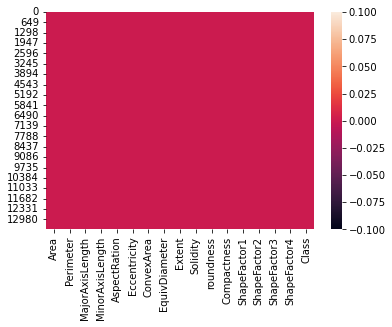

In [46]:
sns.heatmap(df.isna())

###**SEM DADOS AUSENTES PARA O PROCESSAMENTO...** função (dropna) remove valores ausentes

In [58]:
df = df.dropna()

<AxesSubplot:>

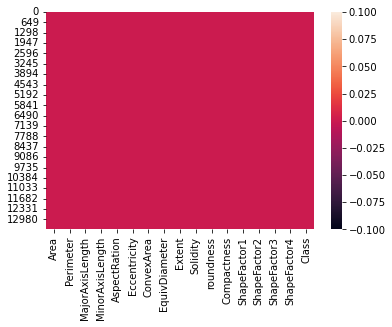

In [59]:
sns.heatmap(df.isna())

In [43]:

df.shape


(13611, 17)

In [42]:
df_duplicates.shape

(13543, 17)

###**CORRELAÇÃO** Com atributos específicos

In [40]:
df2 = df.drop(columns=['Perimeter','ConvexArea','EquivDiameter','Eccentricity','roundness','ShapeFactor1','Compactness','ShapeFactor2','ShapeFactor4'])
df2.corr()

,Area,MajorAxisLength,MinorAxisLength,AspectRation,Extent,Solidity,ShapeFactor3
Area,1.000000,0.931834,0.951602,0.241735,0.054345,-0.196585,-0.272145
MajorAxisLength,0.931834,1.000000,0.826052,0.550335,-0.078062,-0.284302,-0.568185
MinorAxisLength,0.951602,0.826052,1.000000,-0.009161,0.145957,-0.155831,-0.019326
AspectRation,0.241735,0.550335,-0.009161,1.000000,-0.370184,-0.267754,-0.978592
Extent,0.054345,-0.078062,0.145957,-0.370184,1.000000,0.191389,0.347624
Solidity,-0.196585,-0.284302,-0.155831,-0.267754,0.191389,1.000000,0.307662
ShapeFactor3,-0.272145,-0.568185,-0.019326,-0.978592,0.347624,0.307662,1.000000


<AxesSubplot:>

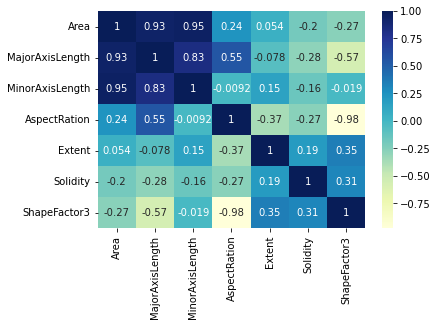

In [41]:
sns.heatmap(df2.corr(), annot=True, cmap='YlGnBu')

####**CORRELAÇÃO** Todos os atributos

In [ ]:
df.corr()

<AxesSubplot:>

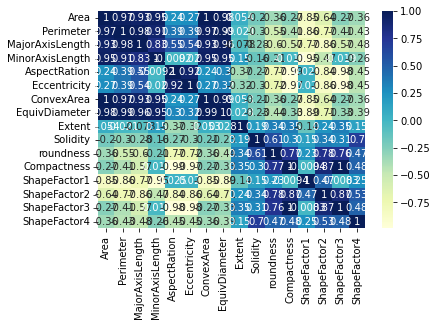

In [39]:
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')

###**GRAFICO DE COLUNAS**

Text(0, 0.5, 'Quantidade')

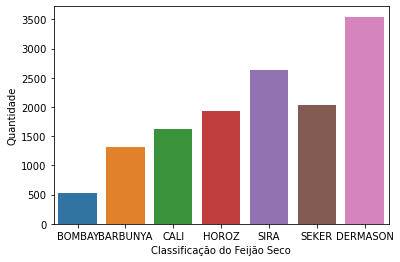

In [38]:
cp_df =  df.replace({"Class": {1:'SEKER',2:'BARBUNYA',3:'BOMBAYER',4:'CALI',5:'HOROZ',6:'SIRA',7:'DERMASON'}})
cp = sns.countplot(x='Class', orient='H', data=cp_df)
cp.set_xlabel("Classificação do Feijão Seco")
cp.set_ylabel("Quantidade")

###*****   **(?) HISTOGRAMA**

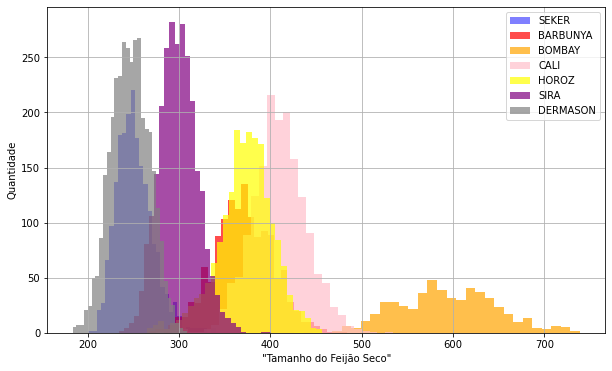

In [60]:
plt.figure(figsize=(10,6))
df[df['Class'] == 'SEKER']['MajorAxisLength'].hist(alpha=0.5, color= 'blue', bins= 30, label='SEKER')
df[df['Class'] == 'BARBUNYA']['MajorAxisLength'].hist(alpha=0.7, color= 'red', bins= 30, label='BARBUNYA')
df[df['Class'] == 'BOMBAY']['MajorAxisLength'].hist(alpha=0.7, color= 'orange', bins= 30, label='BOMBAY')
df[df['Class'] == 'CALI']['MajorAxisLength'].hist(alpha=0.7, color= 'pink', bins= 30, label='CALI')
df[df['Class'] == 'HOROZ']['MajorAxisLength'].hist(alpha=0.7, color= 'yellow', bins= 30, label='HOROZ')
df[df['Class'] == 'SIRA']['MajorAxisLength'].hist(alpha=0.7, color= 'purple', bins= 30, label='SIRA')
df[df['Class'] == 'DERMASON']['MajorAxisLength'].hist(alpha=0.7, color= 'gray', bins= 30, label='DERMASON')
plt.legend()
plt.xlabel('"Tamanho do Feijão Seco"')
plt.ylabel('Quantidade')
plt.show()

In [61]:
seker = df[df['Class'] == "SEKER"]
barbunya = df[df['Class'] == "BARBUNYA"]
bombay = df[df['Class'] == "BOMBAY"]
cali = df[df['Class'] == "CALI"]
horoz = df[df['Class'] == "HOROZ"]
sira = df[df['Class'] == "SIRA"]
dermason = df[df['Class'] == "DERMASON"]

In [64]:
def dicionario(df_seker, df_barbunya,df_bombay,df_cali,df_horoz,df_sira,df_dermason, dict_g):
  for i in range(1, 8):
    qtd_seker = len(df_seker[df_seker['Class'] == i]['MajorAxisLength'])
    qtd_barbunya = len(df_barbunya[df_barbunya['Class'] == i]['MajorAxisLength'])
    qtd_bombay = len(df_bombay[df_bombay['Class'] == i]['MajorAxisLength'])
    qtd_cali = len(df_cali[df_cali['Class'] == i]['MajorAxisLength'])
    qtd_horoz = len(df_horoz[df_horoz['Class'] == i]['MajorAxisLength'])
    qtd_sira = len(df_sira[df_sira['Class'] == i]['MajorAxisLength'])
    qtd_dermason = len(df_dermason[df_dermason['Class'] == i]['MajorAxisLength'])
    dict_g[str(i)].append(qtd_seker)
    dict_g[str(i)].append(qtd_barbunya)
    dict_g[str(i)].append(qtd_bombay)
    dict_g[str(i)].append(qtd_cali)
    dict_g[str(i)].append(qtd_horoz)
    dict_g[str(i)].append(qtd_sira)
    dict_g[str(i)].append(qtd_dermason)
    
dict_g = collections.defaultdict(list)
dicionario(seker,barbunya,bombay,cali,horoz,sira,dermason,dict_g)
print(dict_g)


defaultdict(<class 'list'>, {'1': [0, 0, 0, 0, 0, 0, 0], '2': [0, 0, 0, 0, 0, 0, 0], '3': [0, 0, 0, 0, 0, 0, 0], '4': [0, 0, 0, 0, 0, 0, 0], '5': [0, 0, 0, 0, 0, 0, 0], '6': [0, 0, 0, 0, 0, 0, 0], '7': [0, 0, 0, 0, 0, 0, 0]})


###**FREQUENCIA - "TAMANHO" DO FEIJÃO SECO**. Considerando o atributo (MajorAxisLength) que indica o maior tamanho de extensão do "Feijão seco"

In [67]:
df['MajorAxisLength'].min()

183.6011650038393

In [69]:
df['MajorAxisLength'].max()

738.8601534818813

In [70]:
def countInterval(valorInicial, valorFinal):
  new_df = df.drop(columns='Class')
  dfIntervalo = new_df[new_df['MajorAxisLength'] >= valorInicial]
  intervalo = len(dfIntervalo[new_df['MajorAxisLength'] <= valorFinal])
  return intervalo

In [75]:
df2 = pd.DataFrame(dict_p)
df2.index = ['627.84 - 738.9', '516.78 - 627.84', '405.72 - 516.78', '294.66 - 405.72', '183.6 - 294.66']
df2

,frq_absoluta
627.84 - 738.9,140
516.78 - 627.84,348
405.72 - 516.78,1339
294.66 - 405.72,5121
183.6 - 294.66,6663


In [76]:
# Classifique pelos valores ao longo de cada eixo.
df2 = df2.sort_values(by='frq_absoluta', ascending=False)
df2

,frq_absoluta
183.6 - 294.66,6663
294.66 - 405.72,5121
405.72 - 516.78,1339
516.78 - 627.84,348
627.84 - 738.9,140


In [77]:
# cumsum(axis=None, skipna=True, *args, **kwargs) Return cumulative sum over a DataFrame or Series axis.
df2['frq_acumulada'] = df2['frq_absoluta'].cumsum()/df2['frq_absoluta'].sum()*100
df2

,frq_absoluta,frq_acumulada
183.6 - 294.66,6663,48.953053
294.66 - 405.72,5121,86.577033
405.72 - 516.78,1339,96.414665
516.78 - 627.84,348,98.971420
627.84 - 738.9,140,100.000000


###**GRÁFICO DE PARETO DE AREA - "TAMANHO" DO FEIJÃO SECO**

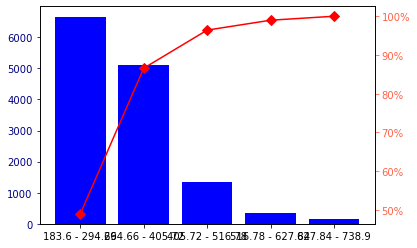

In [78]:
# Gráfico de Pareto
fig, ax = plt.subplots()
ax.bar(df2.index, df2["frq_absoluta"], color="blue")

#Crie eixos gêmeos compartilhando o eixo x.
ax2 = ax.twinx()

#Marker: D ou o
ax2.plot(df2.index, df2["frq_acumulada"], color="red", marker="D", ms=7)

#Defina o formatador do ticker principal. (O de porcentagem)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y", colors="navy")
ax2.tick_params(axis="y", colors="tomato")

plt.show()

In [80]:
df3 = pd.DataFrame(dict_pf)
df3.index = ['627.84 - 738.9', '516.78 - 627.84', '405.72 - 516.78', '294.66 - 405.72', '183.6 - 294.66']
df3

,frq_absoluta
627.84 - 738.9,140
516.78 - 627.84,348
405.72 - 516.78,1339
294.66 - 405.72,5121
183.6 - 294.66,6663


###**POLÍGONO DE FREQUÊNCIA - "TAMANHO" DO FEIJÃO SECO**

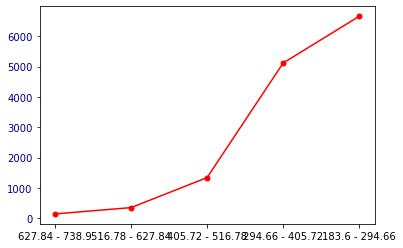

In [85]:
#Polígono de frequência
fig, ax = plt.subplots()
ax.plot(df3.index, df3["frq_absoluta"], color="red", marker="o", ms=5)

ax.tick_params(axis="y", colors="navy")

plt.show()

###**MEDIDAS DE RESUMO**

###**GRÁFICO DE DISPERSÃO**

In [86]:
df_filter = df[df['MajorAxisLength'] > 100]
df_filter = df_filter[df_filter['MajorAxisLength'] < 739]

In [87]:
df_filter.head(10)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,254616,1985.370,738.860153,447.418329,1.651386,0.795806,263261,569.374358,0.783747,0.967162,0.811732,0.770612,0.002902,0.000631,0.593843,0.980663,BOMBAY
1,237270,1921.685,738.144502,412.921647,1.787614,0.828895,240671,549.637650,0.784115,0.985869,0.807399,0.744621,0.003111,0.000590,0.554460,0.991160,BOMBAY
2,251432,1919.868,719.125690,450.926187,1.594775,0.778981,257425,565.803115,0.766776,0.976719,0.857211,0.786793,0.002860,0.000676,0.619043,0.987235,BOMBAY
3,241322,1895.940,726.373493,427.370120,1.699636,0.808598,244319,554.311026,0.820823,0.987733,0.843641,0.763121,0.003010,0.000630,0.582354,0.989790,BOMBAY
4,248424,1884.557,715.053040,446.043618,1.603101,0.781591,251082,562.408446,0.807536,0.989414,0.878992,0.786527,0.002878,0.000679,0.618625,0.991718,BOMBAY
5,234898,1869.885,695.137630,432.589420,1.606922,0.782773,238265,546.883372,0.799468,0.985869,0.844227,0.786727,0.002959,0.000699,0.618939,0.994587,BOMBAY
6,213022,1849.699,721.216098,384.377969,1.876320,0.846142,218065,520.795578,0.737514,0.976874,0.782406,0.722108,0.003386,0.000568,0.521439,0.978387,BOMBAY
7,233751,1849.371,706.993076,423.527988,1.669295,0.800708,237344,545.546530,0.819205,0.984862,0.858846,0.771643,0.003025,0.000661,0.595434,0.993954,BOMBAY
8,222737,1847.940,722.494068,396.696971,1.821274,0.835779,225516,532.538784,0.836552,0.987677,0.819646,0.737084,0.003244,0.000591,0.543293,0.989485,BOMBAY
9,218983,1845.855,713.967282,394.053816,1.811852,0.833896,222086,528.032021,0.745626,0.986028,0.807654,0.739575,0.003260,0.000602,0.546970,0.991030,BOMBAY


<AxesSubplot:xlabel='Class', ylabel='MajorAxisLength'>

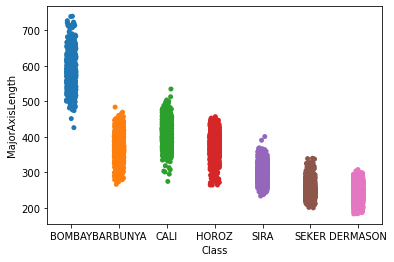

In [88]:
sns.stripplot (x='Class',y='MajorAxisLength',data=df_filter)

###**GRÁFICO BLOX PLOT** Distribui os Valores (mínimo, máximo, Medianas) é analisado pela altura das caixas... neste gráfico analiza-se o tamanho dos feijões pelo atributo (MajorAxisLength). Esta apresentação em específico tem caracter de Anomalia em todos os tipos apresentados

<AxesSubplot:xlabel='Class', ylabel='MajorAxisLength'>

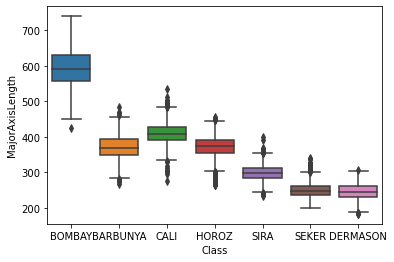

In [89]:
sns.boxplot(x='Class', y='MajorAxisLength', data=df_filter)

###*****  **(ERRO) GRÁFICO VIOLIN PLOT** 

In [ ]:
sns.violinplot(x='Area',y='MajorAxisLength',data=df_filter, hue='Class', split=True)

#**MODELAGEM**

In [113]:
import pandas as pd
import seaborn as sns
import numpy as np
import pylab as pl
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import KElbowVisualizer

In [95]:
df= pd.read_excel("Dry_Bean_Dataset.xlsx")

In [96]:
df.head(10)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,254616,1985.370,738.860153,447.418329,1.651386,0.795806,263261,569.374358,0.783747,0.967162,0.811732,0.770612,0.002902,0.000631,0.593843,0.980663,BOMBAY
1,237270,1921.685,738.144502,412.921647,1.787614,0.828895,240671,549.637650,0.784115,0.985869,0.807399,0.744621,0.003111,0.000590,0.554460,0.991160,BOMBAY
2,251432,1919.868,719.125690,450.926187,1.594775,0.778981,257425,565.803115,0.766776,0.976719,0.857211,0.786793,0.002860,0.000676,0.619043,0.987235,BOMBAY
3,241322,1895.940,726.373493,427.370120,1.699636,0.808598,244319,554.311026,0.820823,0.987733,0.843641,0.763121,0.003010,0.000630,0.582354,0.989790,BOMBAY
4,248424,1884.557,715.053040,446.043618,1.603101,0.781591,251082,562.408446,0.807536,0.989414,0.878992,0.786527,0.002878,0.000679,0.618625,0.991718,BOMBAY
5,234898,1869.885,695.137630,432.589420,1.606922,0.782773,238265,546.883372,0.799468,0.985869,0.844227,0.786727,0.002959,0.000699,0.618939,0.994587,BOMBAY
6,213022,1849.699,721.216098,384.377969,1.876320,0.846142,218065,520.795578,0.737514,0.976874,0.782406,0.722108,0.003386,0.000568,0.521439,0.978387,BOMBAY
7,233751,1849.371,706.993076,423.527988,1.669295,0.800708,237344,545.546530,0.819205,0.984862,0.858846,0.771643,0.003025,0.000661,0.595434,0.993954,BOMBAY
8,222737,1847.940,722.494068,396.696971,1.821274,0.835779,225516,532.538784,0.836552,0.987677,0.819646,0.737084,0.003244,0.000591,0.543293,0.989485,BOMBAY
9,218983,1845.855,713.967282,394.053816,1.811852,0.833896,222086,528.032021,0.745626,0.986028,0.807654,0.739575,0.003260,0.000602,0.546970,0.991030,BOMBAY


### **COMPLEMENTAR COM MEDIANA OS DADOS AUSENTES E CARRREGAR O MAPA**. OBS: a base não possui dados ausentes.

<AxesSubplot:>

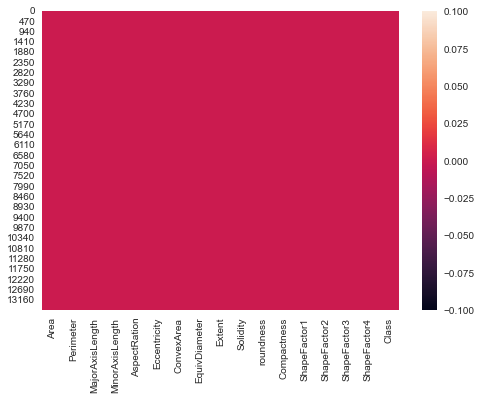

In [97]:
sns.heatmap(df.isna())

### **GRAFICO DE BARRAS COM TIPOS DE "FEIJÃO SECO" POR QUANTIDADES**. OBS: o atrituto de contagem é o 'MajorAxisLength' quanto ao comprimento do feijão

In [100]:
df = df[df['MajorAxisLength'] > 100]
df = df[df['MajorAxisLength'] < 739]

<AxesSubplot:xlabel='Class', ylabel='count'>

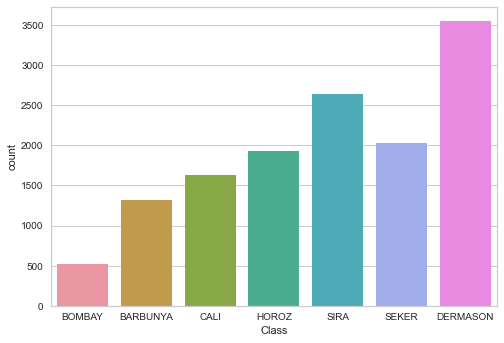

In [101]:
sns.countplot(x='Class',data=df)

### **SELECIONAR VARIAVEIS DE ENTRADA E SAÍDA**

In [102]:
X = df.drop(columns='Class')
y = df['Class']

### **DEFINIÇÃO DOS DADOS DE TREINO E TESTE**. Tamanho dos dados de 70% 

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7)

### **ÁRVORE DA DECISÃO**. Parâmetros...

In [104]:
# Criando modelo e treinando com os dados de treino
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=5)
dtc = dtc.fit(X_train, y_train)
# Fazendo a predição nos dados de treino
resultado_dtc = dtc.predict(X_test)
print(classification_report(y_test, resultado_dtc))

              precision    recall  f1-score   support

    BARBUNYA       0.88      0.78      0.83       943
      BOMBAY       1.00      0.99      1.00       374
        CALI       0.84      0.93      0.88      1151
    DERMASON       0.95      0.83      0.88      2495
       HOROZ       0.95      0.93      0.94      1347
       SEKER       0.93      0.93      0.93      1401
        SIRA       0.77      0.91      0.83      1817

    accuracy                           0.89      9528
   macro avg       0.90      0.90      0.90      9528
weighted avg       0.89      0.89      0.89      9528



### ***** **(?) MATRIZ DE CONFUSÃO**. Correlaciona classes e previsões ( a exemplo de falso - positivo / faso negativo  - Verdadeiro - positivo / Verdadeiro - Negativo)

C:\Users\laris\AppData\Local\Temp\ipykernel_28528\134994862.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_ticklabels(labels);
C:\Users\laris\AppData\Local\Temp\ipykernel_28528\134994862.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.yaxis.set_ticklabels(labels);


<AxesSubplot:title={'center':'Matriz de confusão'}, xlabel='Predição', ylabel='Valores verdadeiros'>

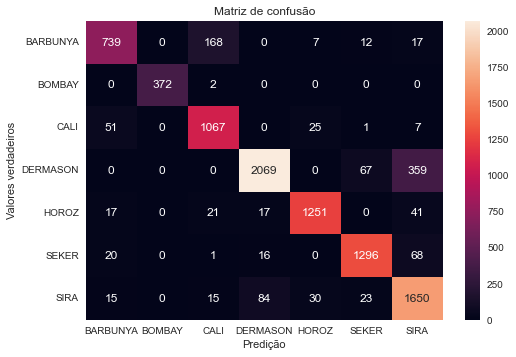

In [105]:
ax= pl.subplot()
labels = ['Seker','Barbunya','Bombayer','Cali','Horoz','Sira','Dermason']
confusion_matrix = pd.crosstab(y_test, resultado_dtc, rownames=['Valores verdadeiros'], colnames=['Predição'])

# Customização
ax.set_title('Matriz de confusão');
ax.xaxis.set_ticklabels(labels); 
ax.yaxis.set_ticklabels(labels);

sns.heatmap(confusion_matrix, annot=True, fmt="d")

In [114]:
dot_data = tree.export_graphviz(dtc, out_file=None, 
                    feature_names=X.columns,  
                     class_names=['Seker','Barbunya','Bombayer','Cali','Horoz','Sira','Dermason'],  
                     filled=True, rounded=True,  
                     special_characters=True,
                    #  max_depth=2
                     )  
graph = graphviz.Source(dot_data)  
graph

NameError: name 'graphviz' is not defined

### **CLUSTERIZAÇÃO** OBS: Remover a Classificação  considerando atributos numericos especificados

In [115]:
#Remove a Severidade, pois ela é a classe e não 
# queremos dar essa informação na clusterização
x = df.drop(columns='Class').values

In [116]:
#Testa a primeira modelagem com o número de clusters = 5
kmeans5 = KMeans(n_clusters=5)
y_kmeans5 = kmeans5.fit_predict(x)

kmeans5.cluster_centers_

array([[4.51222401e+04, 8.03476375e+02, 3.01815639e+02, 1.92120145e+02,
        1.58669244e+00, 7.48845158e-01, 4.56696195e+04, 2.39454311e+02,
        7.45522579e-01, 9.88092675e-01, 8.80533061e-01, 8.00231260e-01,
        6.69167396e-03, 1.72624470e-03, 6.44665933e-01, 9.95602174e-01],
       [1.73798960e+05, 1.58732354e+03, 5.93973652e+02, 3.74562013e+02,
        1.58699096e+00, 7.71189135e-01, 1.76132775e+05, 4.69400922e+02,
        7.76680437e-01, 9.86889505e-01, 8.64223305e-01, 7.92205212e-01,
        3.44012711e-03, 8.41638103e-04, 6.28505044e-01, 9.91818714e-01],
       [7.95838901e+04, 1.10039493e+03, 4.13628567e+02, 2.46907518e+02,
        1.68114112e+00, 7.97314333e-01, 8.08551548e+04, 3.18007344e+02,
        7.55450834e-01, 9.84281039e-01, 8.25913595e-01, 7.70431938e-01,
        5.21660721e-03, 1.13903534e-03, 5.94795901e-01, 9.92133520e-01],
       [3.27252648e+04, 6.69065194e+02, 2.43828757e+02, 1.71124892e+02,
        1.43512919e+00, 6.99859876e-01, 3.31026536e+04, 2.036

In [117]:
plt.scatter(x[:, 0], x[:, 1], c=y_kmeans, cmap='rainbow')
plt.title('Clusters (k=5)')
plt.xlabel('Area')
plt.ylabel('MajorAxisLength')

NameError: name 'y_kmeans' is not defined

### **ELBOW** 

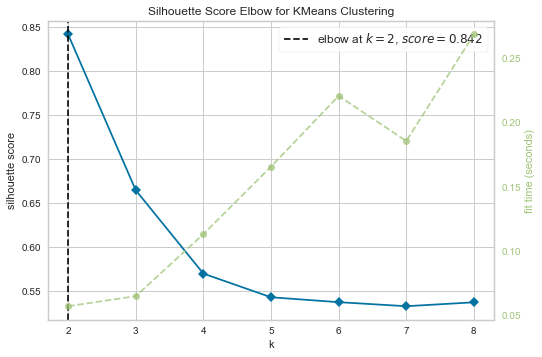

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [118]:
#Visualiza o Elbow para achar o k ideal
#silhouette calinski_harabasz
visualizer = KElbowVisualizer(KMeans(), k=(2,9), timings=True, metric='silhouette')

visualizer.fit(x)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

### **ÍNDICE DE SILHUETA**. Avalia um grupo de dados  / dispersão (coersão / separação)

In [119]:
# Testa o kmeans com o k que o elbow indicou
kmeans7 = KMeans(n_clusters=7)
y_kmeans7 = kmeans7.fit_predict(x)

kmeans7.cluster_centers_

array([[4.11186513e+04, 7.56290676e+02, 2.77362067e+02, 1.90106159e+02,
        1.47129364e+00, 7.07372280e-01, 4.15856450e+04, 2.28655062e+02,
        7.55276253e-01, 9.88804656e-01, 9.04537462e-01, 8.29214962e-01,
        6.75318082e-03, 1.99441715e-03, 6.90997496e-01, 9.96531448e-01],
       [1.58100865e+05, 1.51061199e+03, 5.60876066e+02, 3.61467658e+02,
        1.55381552e+00, 7.60222957e-01, 1.60104604e+05, 4.48313187e+02,
        7.74875450e-01, 9.87531935e-01, 8.70088000e-01, 8.00794597e-01,
        3.55500985e-03, 9.06147431e-04, 6.42120054e-01, 9.92639035e-01],
       [6.82915884e+04, 1.02444448e+03, 3.86133055e+02, 2.27394930e+02,
        1.71143223e+00, 8.00506258e-01, 6.93897233e+04, 2.94716268e+02,
        7.46408716e-01, 9.84202145e-01, 8.18379261e-01, 7.65729134e-01,
        5.67109683e-03, 1.20968456e-03, 5.88469111e-01, 9.92721542e-01],
       [5.23729406e+04, 8.89998088e+02, 3.46538918e+02, 1.94556826e+02,
        1.79924250e+00, 8.13769153e-01, 5.30964957e+04, 2.580

In [120]:
#Rótulos de cada ponto
kmeans7.labels_

array([5, 5, 5, ..., 4, 4, 4])

Text(0, 0.5, 'MajorAxisLength')

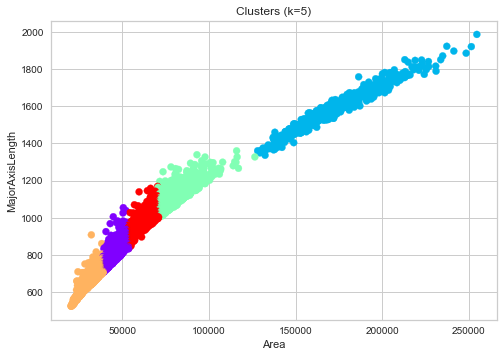

In [121]:
#Gráfico do k=5
plt.scatter(x[:, 0], x[:, 1], c=y_kmeans5, cmap='rainbow')
plt.title('Clusters (k=5)')
plt.xlabel('Area')
plt.ylabel('MajorAxisLength')

#### **SILHOUETTE_SCORE**. Compara o silhouette_score do kmeans com 5 e 2

In [122]:
silhouette_score(x, labels=kmeans5.labels_, metric='euclidean')

0.5432572700891735

In [126]:
silhouette_score(x, labels=kmeans7.labels_, metric='euclidean')

0.5331507479834844